In [309]:
#   активируем библиотеки

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#  Еще одна графическая библиотека
import seaborn as sns

#  Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [310]:
AH = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)

In [311]:
AH.describe(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            8 non-null      float64
 1   PID              8 non-null      float64
 2   MS SubClass      8 non-null      float64
 3   Lot Frontage     8 non-null      float64
 4   Lot Area         8 non-null      float64
 5   Overall Qual     8 non-null      float64
 6   Overall Cond     8 non-null      float64
 7   Year Built       8 non-null      float64
 8   Year Remod/Add   8 non-null      float64
 9   Mas Vnr Area     8 non-null      float64
 10  BsmtFin SF 1     8 non-null      float64
 11  BsmtFin SF 2     8 non-null      float64
 12  Bsmt Unf SF      8 non-null      float64
 13  Total Bsmt SF    8 non-null      float64
 14  1st Flr SF       8 non-null      float64
 15  2nd Flr SF       8 non-null      float64
 16  Low Qual Fin SF  8 non-null      float64
 17  Gr Liv Area      8 

In [312]:
import random

random.randint(0, 38) #31

38

In [313]:
EPmedian = AH['Enclosed Porch'].median()
EPmedian

0.0

Получили, что дома делятся на те в которых есть закрытая веранда и те, у которых такой веранды нет

In [314]:
Porch = AH[AH['Enclosed Porch'] > EPmedian] #459
no_Porch = AH[AH['Enclosed Porch'] == EPmedian] #2471
x = Porch['SalePrice'].sort_values(ascending=False) # по убыванию
y = no_Porch['SalePrice'].sort_values(ascending=False)

In [315]:
from scipy import stats

In [316]:
res = stats.shapiro(x)
print(res.statistic)
res = stats.shapiro(y)
print(res.statistic)

0.8552611913716313
0.8775257896413539


In [317]:
# Функции определяются так.
bins = 8
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x), bins = bins) #alpha=0.5
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y), bins = bins)
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

In [318]:
x.name, y.name = 'Porch', 'no_Porch'

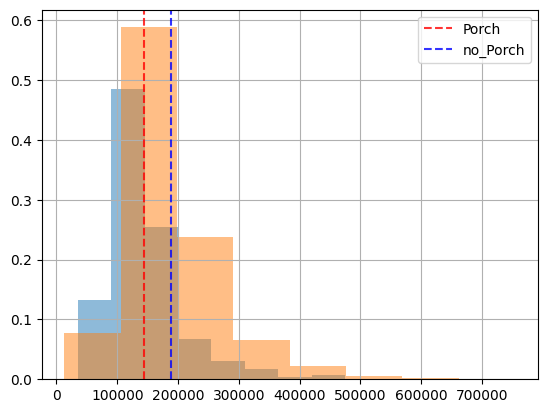

In [319]:
two_histograms(x, y)

В распределении есть выбросы, которые можно удалить.

In [320]:
Porch = AH[(AH['Enclosed Porch'] > EPmedian) & (AH['SalePrice'] < 400000)]
x = Porch['SalePrice'].sort_values(ascending=False)

In [321]:
res = stats.shapiro(x)
print(res.statistic)

0.9154040144957931


In [322]:
x.name= 'no_Porch'

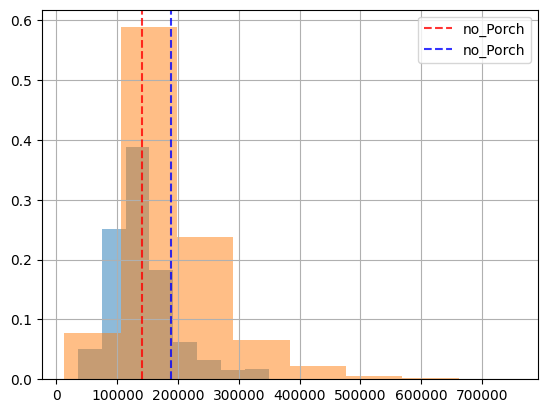

In [323]:
two_histograms(x, y)

Выбросы удалили, распределения имеют колокообразную форму, существенно не отклоняются от нормальности.

Вывод: используем Т-критерий стьюдента

In [324]:
# Перед применение критерия Стюдента проверим гипотезу о равенстве дисперсий
res = stats.fligner(x, y)
print('p-value: ',res[1], res[1] >= 0.01)

p-value:  1.156128444910239e-14 False


Гипотезу о равенстве дисперсий отвергаем. Выборки несвязные

In [325]:
res = stats.ttest_ind(x, y, equal_var=False)
print(res[1] >= 0.01)
res[1]

False


3.1270539862604027e-50

p-значение меньше альфа, гипотезу о равенстве цен при присутствии и отсутствие веранды отвергаем

<Axes: xlabel='No/Yes', ylabel='SalePrice'>

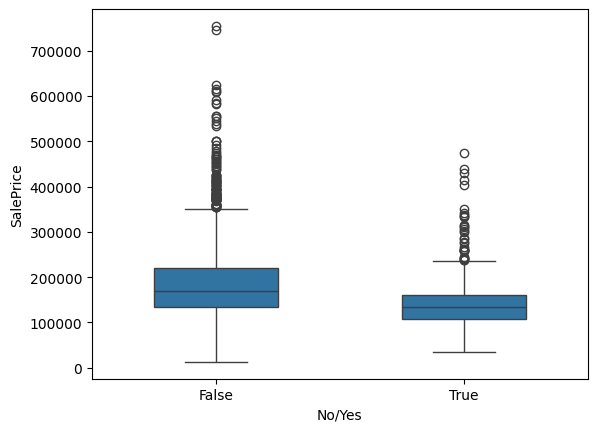

In [326]:
AH['No/Yes'] = AH['Enclosed Porch'] > EPmedian
sns.boxplot(data=AH, y='SalePrice', x='No/Yes', width=.5)

## Проведём сравнение для второй переменной


In [327]:
random.randint(0, 38) # 4

15

Рассмотрим площадь участка

In [328]:
LAmedian = AH['Lot Area'].median()
LAmedian

9436.5

In [329]:
Big_area = AH[AH['Lot Area'] >= LAmedian] #1465
Small_area = AH[AH['Lot Area'] < LAmedian] #1465
x = Big_area['SalePrice'].sort_values(ascending=False)
y = Small_area['SalePrice'].sort_values(ascending=False)
len(Small_area)

1465

Заметим, что дома разделились на две равные части

In [330]:
x.name, y.name = 'Big_area', 'Small_area'

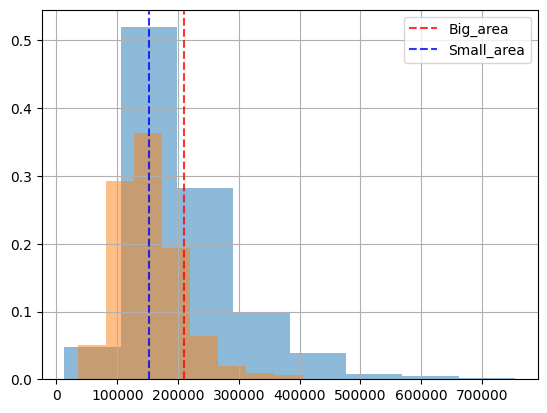

In [331]:
two_histograms(x, y)

Выбросов нет, распределения имеют колокообразную форму, существенно не отклоняются от нормальности.

In [332]:
res = stats.fligner(x, y)
print('p-value: ',res[1], res[1] >= 0.01)

p-value:  1.1998916276068526e-41 False


In [333]:
res = stats.ttest_ind(x, y, equal_var=False)
print(res[1] >= 0.01)
res[1]

False


7.748129442500601e-88

p-значение меньше альфа, гипотезу о равенстве цен при больших и маленьких участках отвергаем.

<Axes: xlabel='Big/Small', ylabel='SalePrice'>

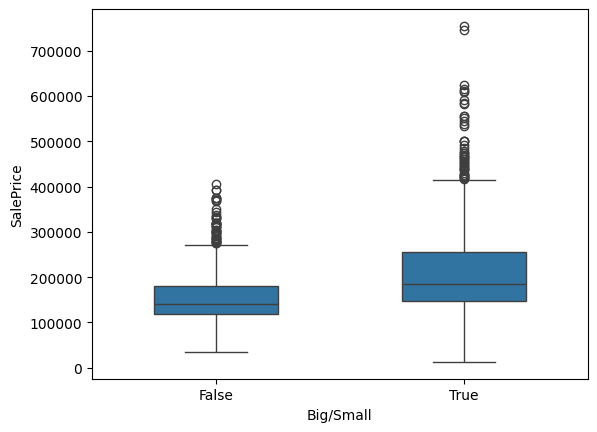

In [334]:
AH['Big/Small'] = AH['Lot Area'] >= LAmedian
sns.boxplot(data=AH, y='SalePrice', x='Big/Small', width=.5)

In [335]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(x, y)
print(U1, p)

1528687.5 4.241365162090767e-88


Вывод: гипотеза отвергается